# Explore Labels

In [10]:
import os
import pandas as pd
import seaborn as sns

from typing import Optional

In [6]:
sns.set_style('darkgrid')

## Utility

In [14]:
def get_transform_type(image) -> Optional[str]:
    _, image = os.path.split(image)
    image = os.path.splitext(image)[0]
    parts = image.split('-')
    ttype = parts[-1]

    return None if ttype.isdigit() else ttype

## Setup

In [2]:
root = '.'

label_file = f'{root}/proj_labels.csv'

## Load Data

In [3]:
df = pd.read_csv(label_file)

In [4]:
df.head()

,image,label,type
0,ESP_013049_0950_RED-0067.jpg,7,train
1,ESP_013049_0950_RED-0067-fv.jpg,7,train
2,ESP_013049_0950_RED-0067-brt.jpg,7,train
3,ESP_013049_0950_RED-0067-r90.jpg,7,train
4,ESP_013049_0950_RED-0067-r180.jpg,7,train


## Type Histogram

Text(0, 0.5, 'Percent')

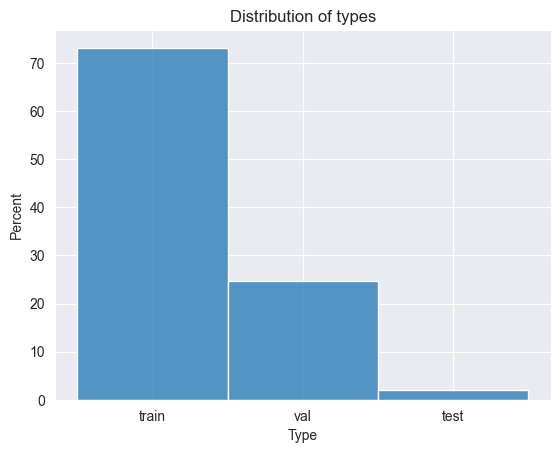

In [9]:
ax = sns.histplot(data=df, x='type', stat='percent')
ax.set_title('Distribution of types')
ax.set_xlabel('Type')
ax.set_ylabel('Percent')

## Remove Augmentations

In [15]:
df['ttype'] = df['image'].apply(get_transform_type)

In [16]:
df.head()

,image,label,type,ttype
0,ESP_013049_0950_RED-0067.jpg,7,train,None
1,ESP_013049_0950_RED-0067-fv.jpg,7,train,fv
2,ESP_013049_0950_RED-0067-brt.jpg,7,train,brt
3,ESP_013049_0950_RED-0067-r90.jpg,7,train,r90
4,ESP_013049_0950_RED-0067-r180.jpg,7,train,r180


In [18]:
df_unaug = df[df['ttype'].isna()]

In [19]:
df_unaug.head()

,image,label,type,ttype
0,ESP_013049_0950_RED-0067.jpg,7,train,None
7,ESP_019697_2020_RED-0024.jpg,1,train,None
14,ESP_015962_1695_RED-0016.jpg,1,train,None
21,ESP_013049_0950_RED-0118.jpg,7,train,None
28,ESP_015962_1695_RED-0017.jpg,1,train,None


In [20]:
df_unaug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2422 entries, 0 to 15087
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2422 non-null   object
 1   label   2422 non-null   int64 
 2   type    2422 non-null   object
 3   ttype   0 non-null      object
dtypes: int64(1), object(3)
memory usage: 94.6+ KB


Text(0, 0.5, 'Percent')

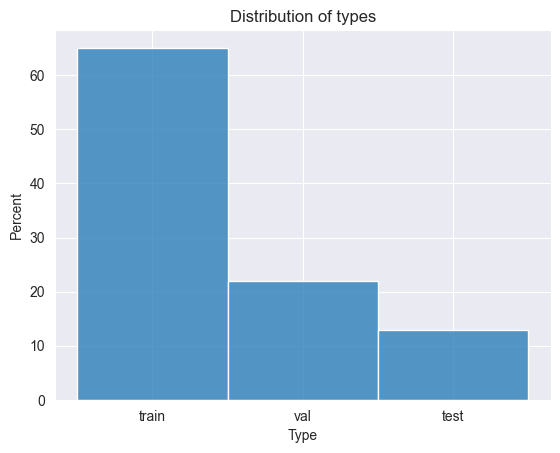

In [21]:
ax = sns.histplot(data=df_unaug, x='type', stat='percent')
ax.set_title('Distribution of types')
ax.set_xlabel('Type')
ax.set_ylabel('Percent')